# ML2 Übung 2 - TensorFlow Einführung

Zunächst werden die benötigten Python Pakete importiert. 

In [1]:
import tensorflow as tf

Nun soll eine Funktion definiert werden, welche mittels TensorFlow ausgeführt wird. Zunächst werden hierzu zwei TensorFlow Variablen erstellt. Die zweite Variable soll dabei von Ihnen erstellt werden. Anschließend wird eine Funktion definiert, welche die erstellten Variablen nutzt.

In [2]:
x = tf.Variable(3, name="x")
#Erstellen Sie hier eine weitere Temnsorflow Variable mit internem Namen y und Standard Wert 4

f = 2*x+y

Zu beachten ist, dass hier noch keine Berechnung ausgeführt wurde. Die Variablen enthalten bereits ihre Standardwerte, die Funktion könnte also bereits berechnet werden. Ein print von f resultiert hier allerdings in einer etwas merkwürdigen Ausgabe:

In [3]:
print(f)

Tensor("add:0", shape=(), dtype=int32)


In TensorFlow werden zunächst die Berechnungsschritte definiert - dies geschieht implizit in Form eines Graphen. In diesem Beispiel sind x, y und f Knoten des Graphen. Die Kanten des Graphen werden definiert durch die Abhängigkeit genutzter Funktionen von anderen Konstanten, Variablen oder Funktionen. In diesem Beispiel ist f abhängig von x und y.

### Sessions

Nachdem der Graph definiert wurde, kann dieser im weiteren Verlauf ausgeführt werden. Diese Ausführung stellt meist den Hauptteil des Programmes dar. Hierfür wird zunächst eine TensorFlow Session erstellt. 

In [4]:
sess = tf.Session()

Sämtliche Berechnungen in TensorFlow werden innerhalb von Sessions ausgeführt. Nachfolgend werden zunächst die Variablen innerhalb der Session initialisiert. Danach kann mithilfe des Run Befehls f berechnet werden. Hierzu werden von TensorFlow die Berechnungen aller Knoten ausgeführt, von denen f abhängig ist.

In [5]:
sess.run(x.initializer)
# Initialisieren Sie die anderen benötigten Variablen

result = sess.run(f)
print(result)

10


Nachdem alle Berechnungen durchgeführt wurden, wird die Session wieder geschlossen.

In [6]:
sess.close()

Da diese Schreibweise doch recht umständlich erscheint, existiert in Python die Möglichkeit, eine Session für einen kompletten Anweisungsblock zu definieren. Hierdurch wird der Code im Allgemeinen auch deutlich verständlicher.

In [7]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
    print(result)

10


Jede Variable von Hand zu initialisieren, kann bei größeren Graphen unübersichtlich und unschön werden. Deshalb bietet TensorFlow die Möglichkeit, alle Variablen einer Session zu initialisieren. Hierzu wird zunächst wieder ein Knoten definiert.

In [8]:
init = tf.global_variables_initializer()

Dieser wird dann innerhalb der Session ausgeführt.

In [9]:
with tf.Session() as sess:
    init.run()
    result = f.eval()
    print(result)

10


### Evaluation mehrerer Funktionen

In einer Session können beliebig viele Knoten ausgeführt werden.

In [10]:
g = f*2
h = f*3

In [11]:
with tf.Session() as sess:
    init.run()
    print(g.eval())
    print(h.eval())

20
30


Das Problem bei der Ausführung ist in diesem Fall, dass der Graph hierbei zweifach ausgeführt wird. Zunächst werden die relevanten Knoten von g ausgehend berechnet. Im nächsten Schritt werden die relevanten Knoten von h ausgehend berechnet. Hierbei wird beispielsweise f zweichfach berechnet.

Um diese Mehrfachberechnung zu vermeiden, müssen die beiden Knoten g und h gemeinsam ausgeführt werden.

In [12]:
with tf.Session() as sess:
    init.run()
    g_val, h_val = sess.run([g, h])
    print(g_val)
    print(h_val)

20
30


### Lernen mit TensorFlow: Lineare Regression

Obligatorisch: Import der Python Pakete:

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

import time
import datetime as dt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from IPython.display import clear_output

Für diese Übung soll mittels einer linearen Regression die Beziehung zwischen Blutdruck und Alter beim Menschen erlernt werden. Hierzu wird zunächst ein Datensatz mit Beispieldaten importiert.

In [14]:
blood_pressure = np.array([[ 39,  47,  45,  47,  65,  46,  67,  42,  67,  56,  64,  56,  59,  34,  42,
                             48,  45,  17,  20,  19,  36,  50,  39,  21,  44,  53,  63,  29,  25,  69],
                           [144, 220, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128,
                            130, 135, 114, 116, 124, 136, 142, 120, 120, 160, 158, 144, 130, 125, 175]])

Zur Visualisierung des Lernproblems werden die Daten zunächst dargestellt.

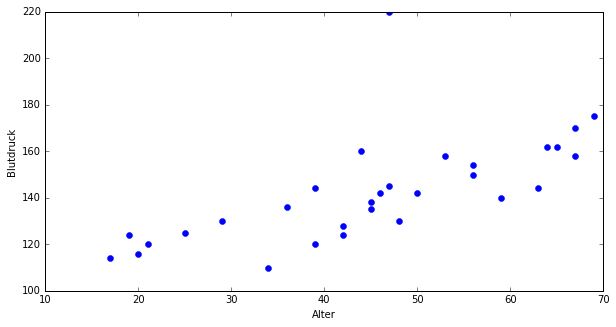

In [15]:
plt.plot(blood_pressure[0], blood_pressure[1], ".", markersize=12)
plt.ylabel("Blutdruck")
plt.xlabel("Alter")
plt.show()

Zunächst muss der Graph, der im bisherigen Verlauf der Übung entstanden ist, zurückgesetzt werden.

Im nächsten Schritt wird der TensorFlow Graph erzeugt. Zunächst werden für die Trainingsdaten und deren Label Platzhalter erstellt. An Stelle der Platzhalter werden bei der Ausführung innerhalb der Session die entsprechenden Daten geladen. Zusätzlich werden die für die lineare Regression benötigten Variablen W und b erzeugt.

In [16]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 1], name='x')        # placeholder for input data
y = tf.placeholder(tf.float32, [None, 1], name='y')       # placeholder for labels

W = tf.get_variable("W", [1,1]) # weight matrix W
b = tf.get_variable("b", [1])   # intersect b

An dieser Stelle wird die Funktion der linearen Regression in Form eines Knotens realisiert. y_pred steht hierbei für das prädizierte Ergebnis des Labels.

In [17]:
y_pred = tf.matmul(x, W) + b

Nachfolgend muss noch eine Fehlerfunktion (Loss) definiert werden, welche im Lernprozess optimiert werden kann. Hier wird der Mean Squared Error verwendet.

In [18]:
mse = tf.reduce_mean(tf.square(y - y_pred))

Zur Durchführung der linearen Regression fehlt nun nur noch ein Optimierer. In diesem Fall wird der GradientDescent Optimizer verwendet. Hierzu muss eine Lernrate definiert werden.

In [19]:
learning_rate = 0.00005

# Define a training step using Gradient Decent to minimize the mean squared error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(mse)

Nachfolgend wird das Training ausgeführt. Zunächst muss noch festgelegt werden, wie viele Schritte des Lernverfahrens durchgeführt werden. Die for-Schleife iteriert hier über die Anzahl der Schritte. In regelmäßigen Abständen werden Zwischenergebnisse ausgegeben, um dem Fortschritt des Lernens folgen zu können.

In [20]:
steps = 20001
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    # Loop over all steps and perform training updates on W and b
    for i in range(steps):      
        # Instead of MiniBatches we can use the whole set here
        xs = np.array([blood_pressure[0]]).transpose(1,0)   # age
        ys = np.array([blood_pressure[1]]).transpose(1,0)   # blood pressure
        _ = sess.run(optimizer, feed_dict={ x: xs, y: ys })
        
        # print training progress every n-th iteration
        if i % 2000 == 0:
            res_W, res_b, res_mse = sess.run([W, b, mse], feed_dict={ x: xs, y: ys})
            clear_output() # If you want to have the whole history, just comment out this line
            print("\nAfter iteration: %d" % i)
            print("W: %f" % res_W)
            print("b: %f" % res_b)
            print("MSE: %f \n" % res_mse)
        
    # Assign to Python variables to use the values outside of TensorFlow
    _b, _W = sess.run([b, W])
    _W = _W[0][0]


After iteration: 20000
W: 2.559531
b: 19.057583
MSE: 913.752930 



Um ein besseres Gefühl für das Ergebnis zu bekommen, kann das Resultat gemeinsam mit dem Datensatz visualisiert werden.

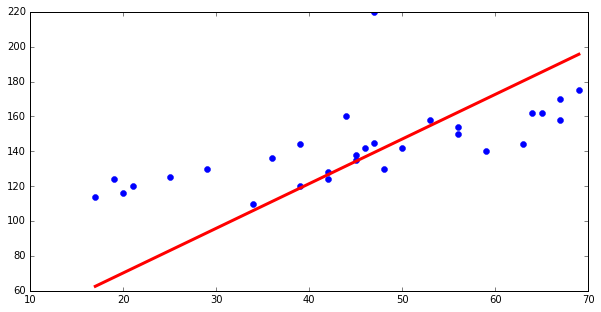

In [21]:
plt.plot(blood_pressure[0], blood_pressure[1], ".", markersize=12)
x1 = min(blood_pressure[0])
x2 = max(blood_pressure[0])
plt.plot([x1, x2], [_b + _W * x1, _b + _W * x2], color='r', linestyle='-', linewidth=3)
plt.show()

Das trainierte Modell kann nun genutzt werden, für eine Person bei gegebenem Alter einen "optimalen" Blutdruck auszugeben.

In [22]:
age = 30
print(_b + _W*age)

[ 95.84350586]


An dieser Stelle wurden lediglich initiale Werte für Lernrate und Schrittzahl gewählt. Diese entsprechen bei weitem noch nicht den zu einem optimalen Ergebnis führenden Parametern. Dies kann auch in der Visualisierung erkannt werden. Dieses Modell würde sehr jungen Menschen einen unverhältnismäßig niedrigen Blutdruck zugestehen.

##### Aufgabe

Ermitteln Sie geeignetere Parameter für diese Lernaufgabe. Ein MSE von 280 liegt durchaus im Bereich des Erreichbaren. Welchen Blutdruck schätzt ein Modell mit einem MSE von 280 für eine 20 jährige Person? 

Hinweis am Rande: Falls nan Werte in den Ergebnissen auftauchen, war vermutlich die Lernrate zu optimistisch gewählt.

### Visualisierung des Lernens mittels TensorBoard

Mit TensorBoard bietet TensorFlow ein sehr mächtiges Tool, um sowohl vergangene als auch gerade ausgeführte Trainings zu beobachten und analysieren. Hierzu muss zunächst der Code etwas modifiziert werden:

In [23]:
# Define summaries to be shown in TensorBoard
tf.summary.scalar("Weight", W[0][0])
tf.summary.scalar("Bias", b[0])
tf.summary.scalar("0_Loss", mse)

<tf.Tensor '0_Loss:0' shape=() dtype=string>

In [24]:
# ------------------------------
# Activate logging for TensorBoard
merged = tf.summary.merge_all()
st = dt.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d_%H-%M-%S')
train_writer = tf.summary.FileWriter('log/lr_' + st, tf.get_default_graph())
# ------------------------------

steps = 10001

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    # Loop over all steps and perform training updates on W and b
    for i in range(steps):      
        # Instead of MiniBatches we can use the whole set here
        xs = np.array([blood_pressure[0]]).transpose(1,0)   # age
        ys = np.array([blood_pressure[1]]).transpose(1,0)   # blood pressure
        summary, _ = sess.run([merged, optimizer], feed_dict={ x: xs, y: ys })
        train_writer.add_summary(summary, i) 
        
        # print training progress every n-th iteration
        if i % 2000 == 0:
            res_W, res_b, res_mse = sess.run([W, b, mse], feed_dict={ x: xs, y: ys})
            clear_output() # If you want to have the whole history, just comment out this line
            print("\nAfter iteration: %d" % i)
            print("W: %f" % res_W)
            print("b: %f" % res_b)
            print("MSE: %f \n" % res_mse)     
        
    # Assign to Python variables to use the values outside of TensorFlow
    _b, _W = sess.run([b, W])
    _W = _W[0][0]


After iteration: 10000
W: 2.766061
b: 8.701967
MSE: 1089.302979 



Nachfolgend muss TensorBoard zunächst auf der Konsole gestartet werden. Hierzu muss zunächst in einer neuen Konsole in den ml2 virtualenv gewechselt werden. Danach kann mittels des Befehls 

`tensorboard --logdir [logdir]`

TensorBoard gestartet werden.

[logdir] entspricht hierbei dem Verzeichnis, in das durch Tensorflow geschrieben wird. In diesem Fall wurden die Logs des Trainings in das aktuelle Verzeichnis von jupyter geschrieben. Innerhalb dieses Verzeichnisses wird für jedes Training ein weiteres Verzeichnis mit dem Startdatum des Trainings angelegt. Wird beim Start von TensorBoard das Überverzeichnis (log/) angegeben, kann innerhalb von Tensorboard zwischen den Trainings gewechselt werden. Wahlweise können auch die ERgebnisse aller Trainingsläufe gemeinsam visualisiert werden.

Auch TensorBoard gibt beim Start eine URL aus, mittels welcher in einem Browser ein grafisches FrontEnd aufgerufen werden kann.